> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser type in the console:


> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`


> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View --> Cell Toolbar --> None`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gamma
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Intro to Bayesian Statistics - Priors

_Author: Alex Combs (NYC) _

---

<a id="learning-objectives"></a>
### Learning Objectives

After this lesson, you will be able to:

- Describe the difference between the Bayes and Frequentist view 
- Understand the concept of the prior and posterior
- Create a prior and update it based on observed data

### Lesson Guide

- [LEARNING OBJECTIVES](#learning-objectives)
- [Bayes' Rule Review](#bayes-rule-review)


- [Two Coins in a Bag Example](#two-coins-in-a-bag-example)
- [Frequentist vs. Bayesian](#frequentist-vs-bayesian)
    - [So what does this mean for our coins?](#so-what-does-this-mean-for-our-coins)


- [Maximum Likelihood Esimation](#maximum-likelihood-esimation)
- [Strength of priors](#strength-of-priors)
	- [Potential probability density for "somewhat sure it's fair"](#potential-probability-density-for-somewhat-sure-its-fair)
	- [Potential probability density for "really sure it's fair"](#potential-probability-density-for-really-sure-its-fair)
	- [Potential probability density for "really sure it's tails-biased"](#potential-probability-density-for-really-sure-its-tails-biased)
	- [How could we express our belief of the value of p?](#how-could-we-express-our-belief-of-the-value-of-p)


- [Coin 3-flips example](#coin--flips-example)
	- [Let's simulate all three flips](#lets-simulate-all-three-flips)
    - [Let's start with a prior that reflects a likely fair coin](#lets-start-with-a-prior-that-reflects-a-likely-fair-coin)
	- [So are informed priors better?](#so-are-informed-priors-better)
	- [Let's suppose the coin is biased now](#lets-suppose-the-coin-is-biased-now)
	- [The final distribution is not as expected due to the incorrect prior](#the-final-distribution-is-not-as-expected-due-to-the-incorrect-prior)


- [Considerations](#considerations)


<a id="bayes-rule-review"></a>
### Bayes' Rule Review

 $$ P\;(\;A\;|\;B\;) = \frac{P\;(\;B\;|\;A\;)\;P\;(\;A\;)}{P\;(\;B\;)} $$



#### In the context of statistical modeling ...


 $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$

Or in plain english:

> What is the probability of our model being true, given the data we have? This depends on the likelihood of the observed data given our model and the data itself, as well as our prior belief that this model is true.


<a id="terminology"></a>
### Terminology 

 $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$

> - We start with the **prior probability** estimate $P\;(\;model\;)$.
- We update it to the **posterior probability** estimate $P\left(\;model\;|\;data\;\right)$, which takes into account the observed data.

where:

$P\left(\;model\;|\;data\;\right)$ is the **posterior probability**

$P\left(\;data\;|\;model\;\right)$ is the **likelihood,** which is the probability of what we observed  given our prior belief about the model. 

${P(\;data\;)}$ is the **marginal probability** of the observed data. This is also known as the **evidence** or the **normalization constant.**

$P\left(\;model\;\right)$ is the **prior probability** belief. It is what you thought the model was before observing the events.

<a id="two-coins-in-a-bag-example"></a>
### Two Coins in a Bag Example

You have two coins in a bag.  One you know is fair, and one you know is biased.

    coin FAIR has a 50% chance of flipping heads.
    coin RIGGED has 99% chance of flipping heads.
    
Your friend chooses one of the two coins at random. He flips the coin and gets heads. 

#### In-class Exercise

Using Bayes' Theorem, what is the probability that the coin flipped was **FAIR**? Recall:

 $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$


#### Solution

We are asked the probability that a coin flipped heads is $FAIR$. So, our **model is FAIR** and **data is heads**.

We want to know:

- $P\;(\;FAIR\;|\;heads\;)$

We are given:

- $P\;(heads\;|\;FAIR\;) = 0.5$
- $P\;(heads\;|\;RIGGED\;) = 0.99$
- $P\;(\;FAIR\;) = P\;(\;RIGGED\;) = 0.5$

Since there are exactly two non-overlapping events that can occur:

- $P\;(\;heads\;) = P\;(\;heads \cap FAIR\;) + P\;(\;heads \cap RIGGED\;) = 0.5 \cdot 0.5 + 0.5 \cdot 0.99 = 0.745$.

Then:

$$P\left(\;FAIR\;|\;heads\;\right) = \frac{P\left(\;heads\;|\;FAIR\;\right)}{P(\;heads\;)} P\left(\;FAIR\;\right) = \frac{0.5}{0.745} \cdot 0.5 \approx 0.3356 $$

**So, a coin flipped heads is $FAIR$ with about 34% chance.**

> Our original fair coin estimate (**prior probability**) was 0.5. However, with the new data of a heads flip, we update it to our **posterior probability** estimate of 0.3356.

<a id="frequentist-vs-bayesian"></a>
### Frequentist vs. Bayesian 

**Frequentists** believe the "true" distribution is fixed (but not known). We can infer more more about this "true" distribution by engaging in sampling, testing for effects, and studying relevant parameters of the population.

**Bayesians** believe that data informs us about the distribution, and as we receive more data our view of the distribution can be updated, further confirming or denying our previous beliefs (but never in certainty).


<a id="so-what-does-this-mean-for-our-coins"></a>
### So what does this mean for our coins?

A **Frequentist** believes that a given coin has a precise bias.  And if we have enough information about the coin (i.e., we flip it enough times), we can make a good estimate of that precise bias.

A **Bayesian** believes that a given coin does not have a precise bias, but rather that there is a distribution of all possible biases and their associated probabilities.  As we flip the coin, we can learn more about these probabilities and refine our belief, but we will never find the precise bias.  In fact, it does not exist.  Rather, a distribution of possible biases with differing probabilities exists.

So actually, if we are true Bayesians, our starting assumption that we know that one coin has a 50% bias and one coin has a 99% bias is fundamentally flawed...
- What should we do instead?

<a id="random-variable-distributions"></a>
### Random Variable Distributions

The coin flip generates a binary outcome: it is either heads of tails.  

> **Check:** What probability distribution is used to describe a binary random variable?





<a id="bernoulli"></a>
### Bernoulli

This is a discrete random variable.

- The probability of getting a head is $p$

- The probability of getting a tail is $1-p$

**Check:** When we flip the coin, what is the model parameter we are trying to estimate?

$p$

<a id="intuitively-how-are-we-doing-this"></a>
## Intuitively, how are we doing this?

We start with a belief about all the possible values of p, and the associated probabilities.  We then flip the coin, and based on what we see, we update this belief.  We still end up with a distribution of all possible probabilities and our associated confidence. However, the new distribution is hopefully more informative.

<a id="lets-run-through-an-example"></a>
## Let's run through an example

We have a coin and want to estimate the bias.

If we don't have any information at all about the coin, what might our prior belief about the distribution of biases and their associated probabilities be?

We could assume a uniform distribution; every possible value of bias ($p$) is equally likely.

> **Check:** What would that distribution look like?  What is the area under the curve?

In [31]:
# this is the likelihood, B(x)(p)
def B(x):
    return lambda p: (p**x) * (1 - p)**(1-x)

# all possible ps
P1 = np.arange(0,1, 0.01)

# uniform prior
prior = lambda p: 1

prior_chart = [prior(p) for p in P1]


In [27]:
def draw_dist(values, ylim=None):
    fig, ax = plt.subplots(figsize=(13,6))
    ax.plot(P1,values)
    ax.set_xlim(0,1)
    
    if ylim:
        ax.set_ylim(0,ylim)
        
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlabel("Value of bias / p", size=18)
    ax.set_title("Probability density for model parameter p", size=18); 

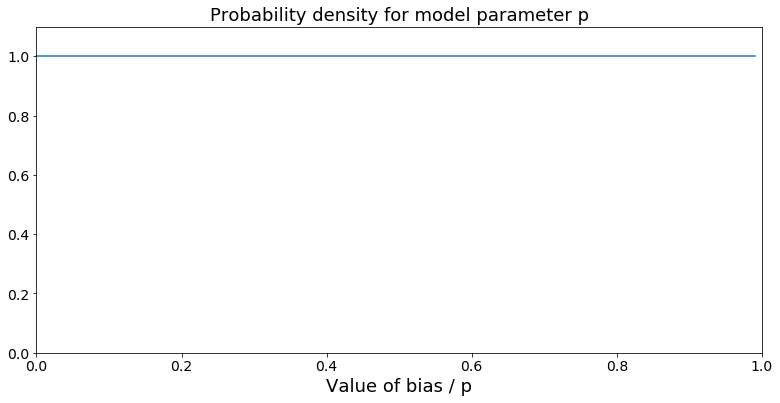

In [28]:
draw_dist(prior_chart, ylim=1.1)

Let's say we flip a coin, and we see heads (recall, p is the probability of getting heads).

We want to update our prior (the uniform distribution) now that we have this information.

> **Check:** What might this look like?


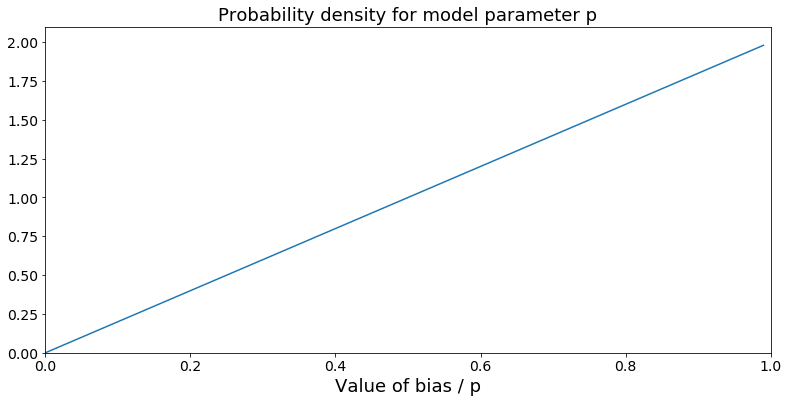

In [36]:
flip1 = 1  # Heads

# this is the likelihood, B(x)(p)
# def B(x):
#     return lambda p: (p**x) * (1 - p)**(1-x)

# See the 
# quad(func, a, b) -- Indefinite integral of func from a to b
post = lambda p: (B(flip1)(p)*prior(p)) / (quad(lambda p: B(flip1)(p)*prior(p), 0,1 )[0])

post_chart = [post(p) for p in P1]
draw_dist(post_chart, ylim=2.1)

We flip again, and see tails. We update our belief again.  But this time, we don't start with the uniform!  We start with our updated prior (the posterior) to get a new posterior.

Recall that $p$ is the probability of bias toward heads. So $p=0$ means always tails, $p=1$ means always heads.

> **Check:** What happens to the shape of the distribution?

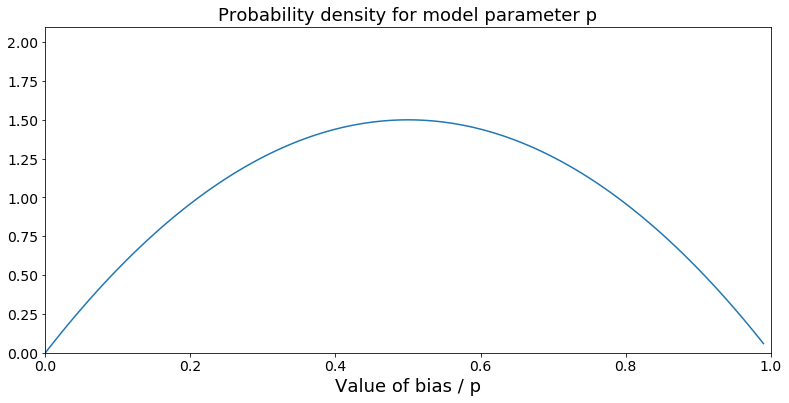

In [37]:
flip1 = 1  # Heads
flip2 = 0  # Tails

post = lambda p: (B(flip1)(p) * B(flip2)(p) * prior(p)) / \
                 (quad(lambda p: B(flip1)(p) * B(flip2)(p) * prior(p), 0,1 )[0])

post_chart = [post(p) for p in P1]
draw_dist(post_chart, ylim=2.1)

One more time.  This time we see tails.

Recall that $p$ is the probability of bias toward heads. So $p=0$ means always tails, $p=1$ means always heads.

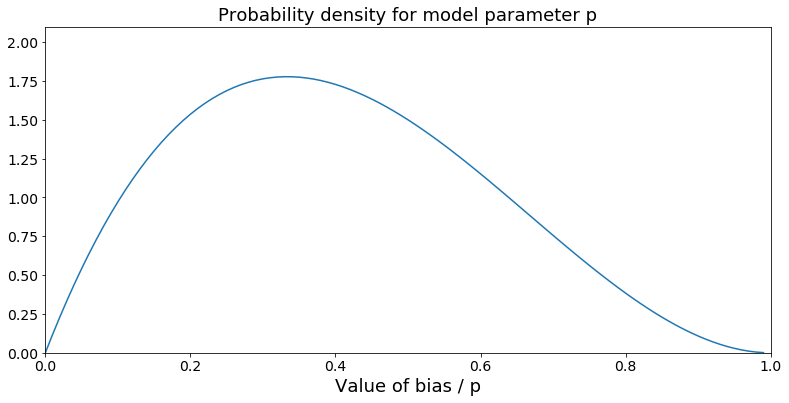

In [38]:
flip1 = 1  # Heads
flip2 = 0  # Tails
flip3 = 0  # Tails

post = lambda p: (B(flip1)(p) * B(flip2)(p) * B(flip3)(p) * prior(p)) / \
                 (quad(lambda p: B(flip1)(p) * B(flip2)(p) * B(flip3)(p) * prior(p), 0,1 )[0])

post_chart = [post(p) for p in P1]
draw_dist(post_chart, ylim=2.1)

Observations:

- The peak is at ~0.33, which happens to be the same as our observation distribution - 1 head, 2 tails!

- $p = 0.0$ and $p = 1.0$ should be 0.0, since we have observed both heads and tails.

- This graph is probability density, so the area under the curve should be 1.

<a id="now-what"></a>
## Now what?

Well assuming we could keep flipping the coin, we could keep updating our distribution.

But let's say that's it.  We can't flip the coin any more. (Perhaps we can't collect any more data!)

If we needed to come up with a single point estimate for p, what could we do?

We could either take the:

- expected value (weighted mean) of p or
- most likely p

> **Check:** What is the most likely p?

#### We've actually seen this before!

> **Check:** How do we calculate the model parameters (coefficients) for a logistic regression?

<a id="maximum-likelihood-esimation"></a>
## Maximum Likelihood Esimation

Given the data I've collected, what is/are the most likely coefficient(s)?

It's the same concept - we don't know for sure what our coefficients are, but based the observations we have, what are the most likely coefficients to model this system.

<a id="strength-of-priors"></a>
## Strength of priors

We may have a weak belief in our prior, or we might have sufficient domain knowledge / experience that we have strong views about our prior.

> **Check:** In the above coin example, did we have a weak or strong belief?

What if we know a lot about our system ahead of time.  For example, let's say we've been in the business of flipping coins for years, and we have connections at the coin factory (mint?).  We know that they try to make unbiased coins.

> **Check:** What prior should we start with?


In [45]:
# This is the pdf of the Beta Distribution
# - See https://en.wikipedia.org/wiki/Beta_distribution#Probability_density_function

def Beta(a, b):
    return lambda p: (gamma(a+b) / (gamma(a)*gamma(b))) * np.exp((a - 1)*np.log(p)) * np.exp((b - 1)*np.log(1-p))

<a id="potential-probability-density-for-somewhat-sure-its-fair"></a>
### Potential probability density for "somewhat sure it's fair"

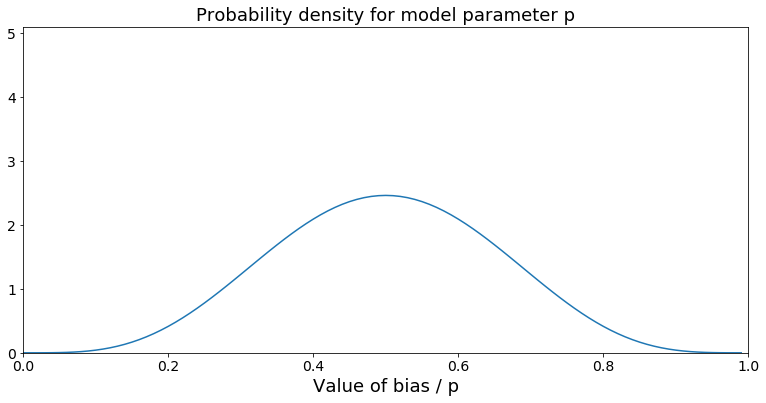

In [46]:
prior = lambda p: Beta(5,5)(p)
prior_chart = [prior(p) for p in P1]
draw_dist(prior_chart, ylim=5.1)

<a id="potential-probability-density-for-really-sure-its-fair"></a>
### Potential probability density for "really sure it's fair"

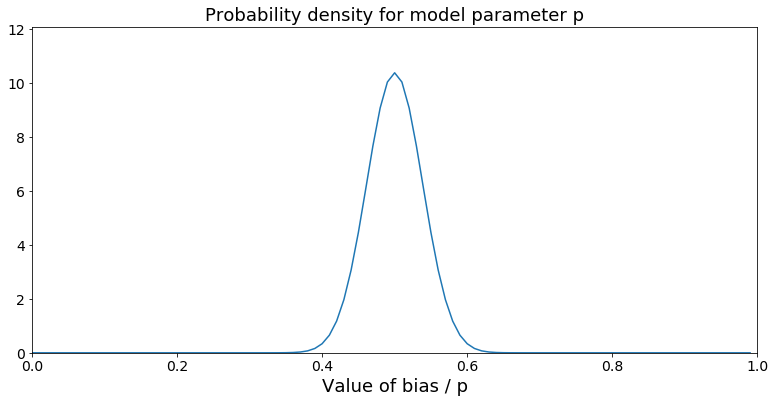

In [47]:
prior = lambda p: Beta(85,85)(p)
prior_chart = [prior(p) for p in P1]
draw_dist(prior_chart, ylim=12.1)

<a id="potential-probability-density-for-really-sure-its-tails-biased"></a>
### Potential probability density for "really sure it's tails-biased"

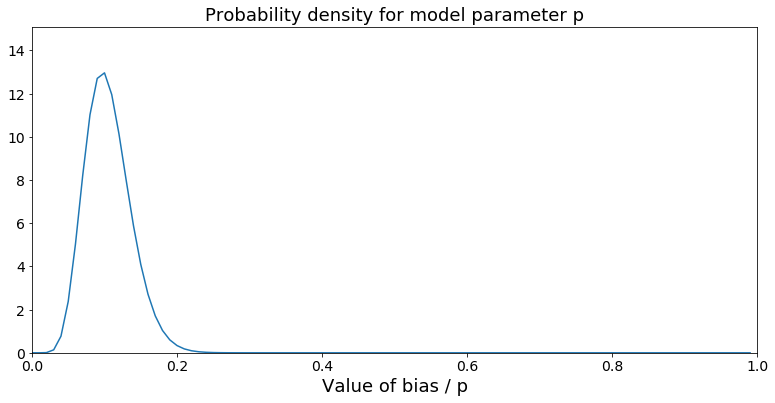

In [48]:
prior = lambda p: Beta(10,85)(p)
prior_chart = [prior(p) for p in P1]
draw_dist(prior_chart, 15.1)

<a id="how-could-we-express-our-belief-of-the-value-of-p"></a>
### How could we express our belief of the value of p?

We can express our belief of the probability that the bias lies in an interval.

How do we do that?

We can integrate the PDF in that interval

In [54]:
# belief that p is in interval [x, y]

x = 0.2
y = 0.6

# quad(func, a,b) -- the indefinite integral of func from a to b
print quad(prior, x,y)[0]

0.00516561860058


<a id="coin--flips-example"></a>
### Coin 3-flips example
We have a coin.  We are allowed to flip it 3 times to update our distribution of what we believe to be the bias.

This coin is in fact unbiased (or, let's say, over time, it will produce heads and tails equally), but we don't know that.  

So let's first see what happens if we start with a uniform prior.

<a id="lets-simulate-all-three-flips"></a>
### Let's simulate all three flips



In [55]:
# flipping function
def flip(threshold=0.5):
    outcome = np.random.rand(1)[0]
    if outcome < threshold:
        return 0
    else:
        return 1

In [58]:
flips = [flip() for i in range(3)]

print flips

[1, 0, 0]


Let's write these in marker so we remember them.

<a id="we-start-with-a-uniform-prior-ie-we-have-no-belief-that-any-value-of-p-is-more-likely-than-any-other"></a>
## We start with a uniform prior (i.e., we have no belief that any value of p is more likely than any other)

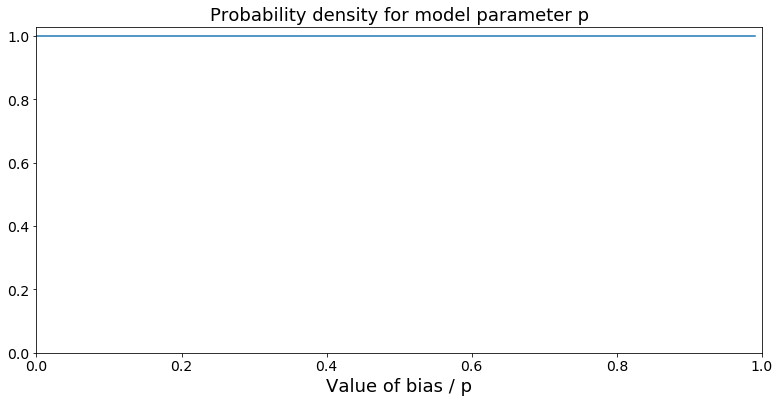

In [60]:
prior = lambda p: 1
prior_chart = [prior(p) for p in P1]
draw_dist(prior_chart, np.max(prior_chart) + 0.03)

<a id="lets-update-based-on-our-first-flip"></a>
## Let's update based on our first flip

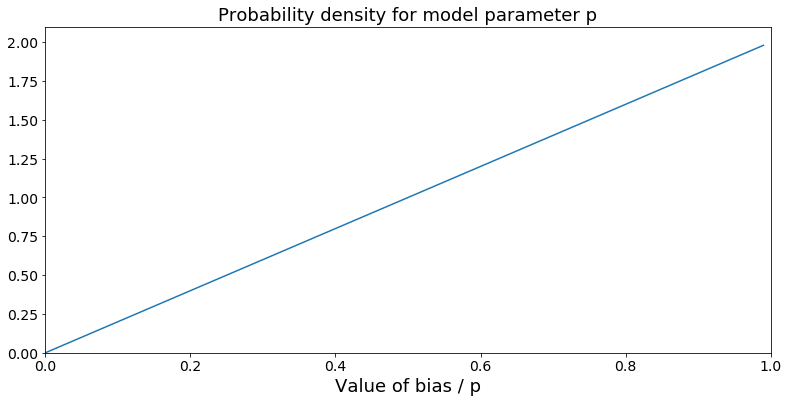

In [61]:
flip1 = flips[0]

post = lambda p: (B(flip1)(p) * prior(p))/(quad(lambda p: B(flip1)(p) * prior(p), 0,1 )[0])
post_chart = [post(p) for p in P1]
draw_dist(post_chart, 2.1)

<a id="lets-update-based-on-our-second-flip"></a>
## Let's update based on our second flip

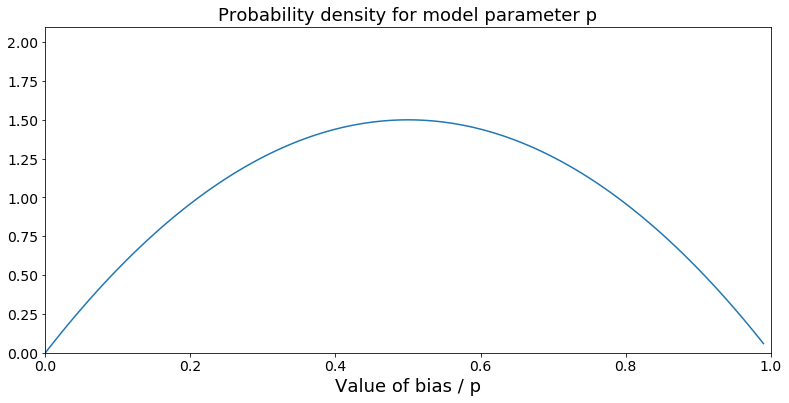

In [62]:
flip1, flip2 = flips[0], flips[1]

post = lambda p: (B(flip1)(p) * B(flip2)(p) * prior(p)) / (quad(lambda p: B(flip1)(p) * B(flip2)(p) * prior(p), 0,1 )[0])
post_chart = [post(p) for p in P1]
draw_dist(post_chart, 2.1)

<a id="lets-update-based-on-our-third-flip"></a>
## Let's update based on our third flip

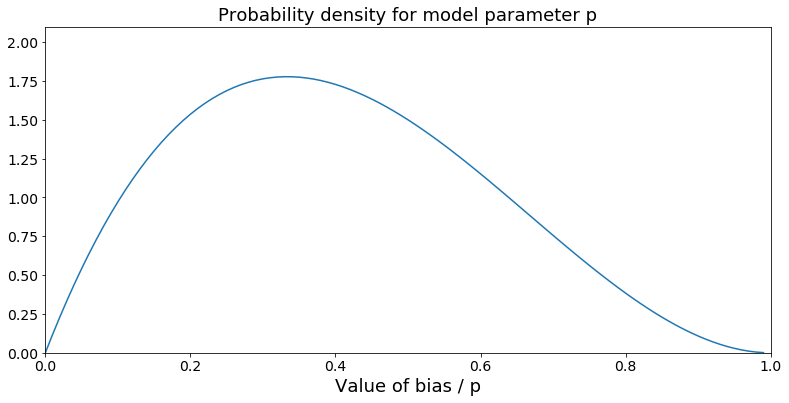

In [65]:
flip1, flip2, flip3 = flips[0], flips[1], flips[2]

post = lambda p: (B(flip1)(p) * B(flip2)(p) * B(flip3)(p) * prior(p)) / \
                 (quad(lambda p: B(flip1)(p) * B(flip2)(p) * B(flip3)(p) * prior(p), 0,1 )[0])

post_chart = [post(p) for p in P1]
draw_dist(post_chart, 2.1);

Looks like it's more likely to have a bias > 0.5, than < 0.5

We find this even though the coin is unbiased (at least, in this experiment).

> **Check:** Why?

In [67]:
print quad(post,0,0.5)[0]   # Area in interval [0, 0.5]
print quad(post,0.5,1)[0]   # Area in interval [0.5, 1.0]

0.6875
0.3125


Since our prior is uniform (not very informed), the data affects our posterior strongly.

Let's say instead that, before we even start flipping, we believe the coin is likely to be fair.  

We're not super sure, but reasonably sure.

<a id="lets-start-with-a-prior-that-reflects-a-likely-fair-coin"></a>
### Let's start with a prior that reflects a likely fair coin

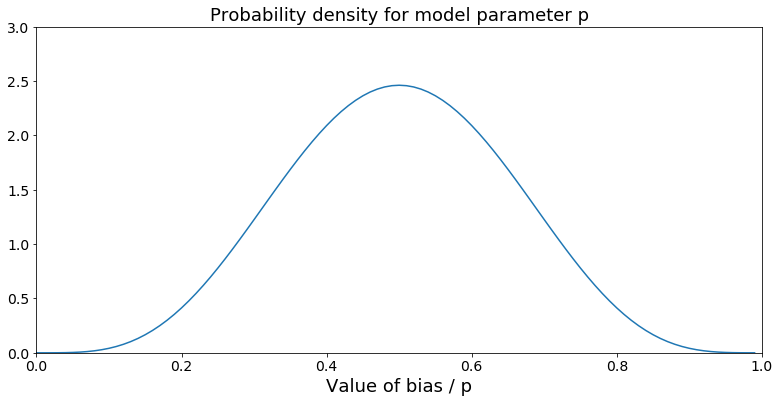

In [68]:
prior2 = lambda p: Beta(5,5)(p)
prior2_chart = [prior2(p) for p in P1]
draw_dist(prior2_chart, 3)

<a id="lets-update-based-on-our-first-flip"></a>
### Let's update based on our first flip

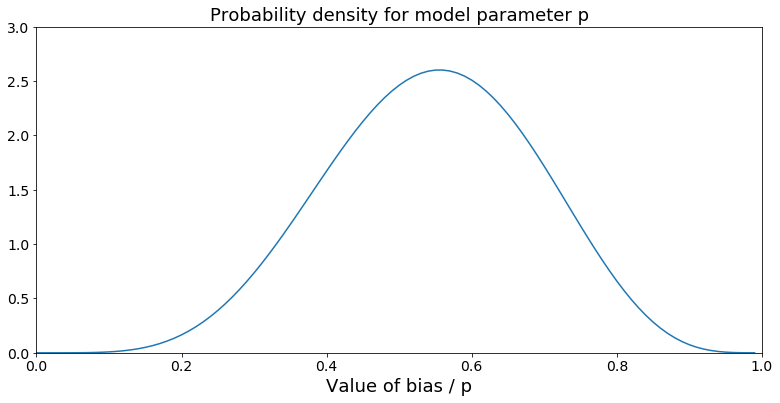

In [69]:
flip1 = flips[0]

post2 = lambda p: (B(flip1)(p)*prior2(p))/(quad(lambda p: B(flip1)(p)*prior2(p), 0,1 )[0])
post2_chart = [post2(p) for p in P1]
draw_dist(post2_chart, 3)

<a id="lets-update-based-on-our-second-flip"></a>
## Let's update based on our second flip

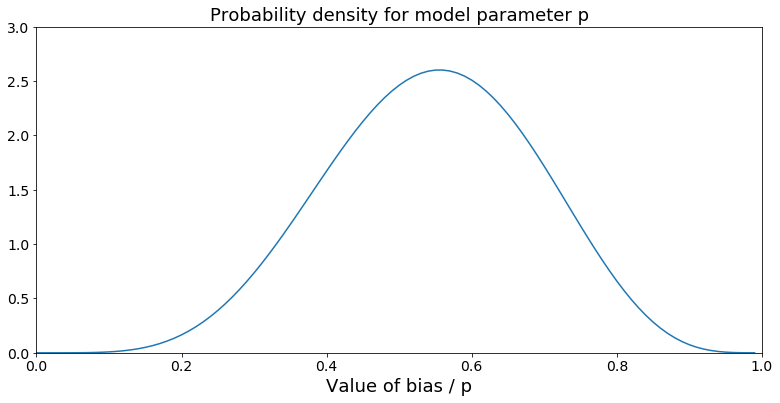

In [71]:
flip1, flip2 = flips[0], flips[1]

post2 = lambda p: (B(flip1)(p) * B(flip2)(p) * prior2(p)) / (quad(lambda p: B(flip1)(p) * B(flip2)(p) * prior2(p), 0,1 )[0])

post_chart = [post2(p) for p in P1]
draw_dist(post2_chart, 3)

<a id="lets-update-based-on-our-third-flip"></a>
## Let's update based on our third flip

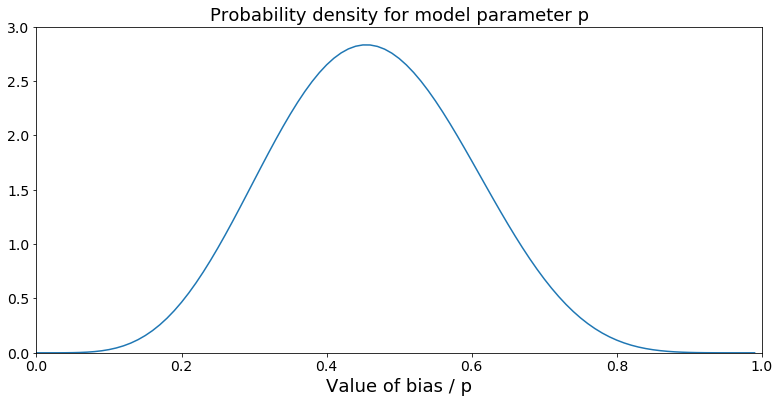

In [72]:
flip1, flip2, flip3 = flips[0], flips[1], flips[2]

post2 = lambda p: (B(flip1)(p) * B(flip2)(p) * B(flip3)(p) * prior2(p)) / \
                  (quad(lambda p: B(flip1)(p) * B(flip2)(p) * B(flip3)(p) * prior2(p), 0,1 )[0])
post2_chart = [post2(p) for p in P1]
draw_dist(post2_chart, 3)

Since we started with a reasonably strong prior, even though we saw two heads and a tail, our distribution is fairly closely centred at 0.5.

<a id="so-are-informed-priors-better"></a>
### So are informed priors better?



Nope, not if you're wrong...

<a id="lets-suppose-the-coin-is-biased-now"></a>
### Let's suppose the coin is biased now

**Our prior reflects that:**

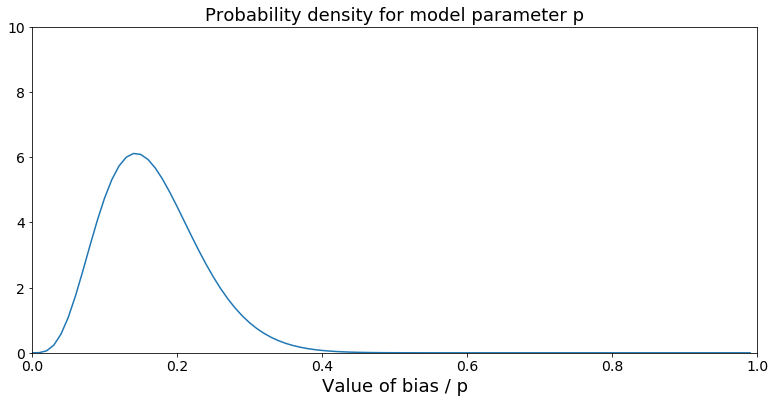

In [74]:
prior3 = lambda p: Beta(5,25)(p)

prior3_chart = [prior3(p) for p in P1]
draw_dist(prior3_chart, 10)

<a id="lets-update-for-all-flips-at-once"></a>
### Let's update for all flips at once 

(What assumption are we making when we do this?)

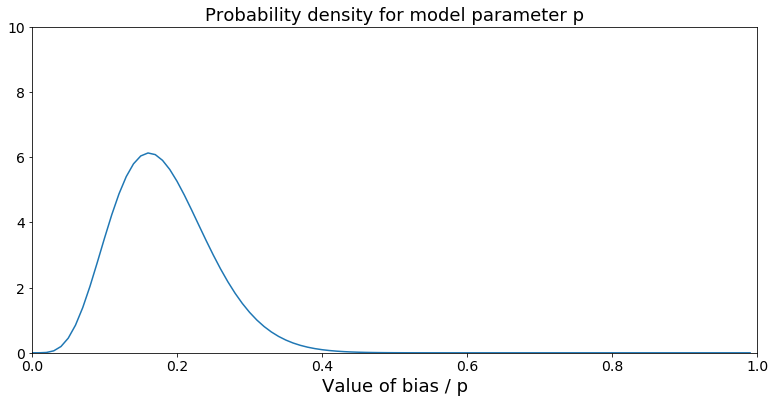

In [76]:
flip1, flip2, flip3 = flips[0], flips[1], flips[2]

post3 = lambda p: (B(flip1)(p)*B(flip2)(p)*B(flip3)(p)*prior3(p))/\
(quad(lambda p: B(flip1)(p)*B(flip2)(p)*B(flip3)(p)*prior3(p), 0,1 )[0])
post3_chart = [post3(p) for p in P1]
draw_dist(post3_chart, 10)

<a id="the-final-distribution-is-not-as-expected-due-to-the-incorrect-prior"></a>
### The final distribution is not as expected due to the incorrect prior

No matter what our initial flips were, we didn't get enough data to update our prior sufficiently to reflect the fact that the coin is more likely to be unbiased than not ...

<a id="considerations"></a>
## Considerations

**Informed prior**:
- If you're right, get better estimates faster
- If you're wrong, takes longer to correct
    
**Uninformed prior**:
- Takes longer to hone in,  but less long than if you picked a bad prior